# Логистическая регрессия

В основе - 2 класса объектов - задачей бинарной классификации (вероятность принадлежности к тому или иному классу).\
Целевая переменная ограничена дискретным набором значений

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Inga/Market_test/Логистическая регрессия/tips_extended.csv')

In [3]:
df[:2]

,Bill,Number_of_People,Arrived_in,Time_of_visit,Tips
0,16,1,bike,morning,0
1,23,2,bike,morning,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Bill              50 non-null     int64 
 1   Number_of_People  50 non-null     int64 
 2   Arrived_in        46 non-null     object
 3   Time_of_visit     48 non-null     object
 4   Tips              50 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [5]:
df.Tips.value_counts()

0     28
5      8
8      2
10     2
20     2
4      2
9      1
2      1
3      1
6      1
7      1
15     1
Name: Tips, dtype: int64

In [6]:
df.Arrived_in.value_counts()

bike    24
car     22
Name: Arrived_in, dtype: int64

In [7]:
df.Number_of_People.value_counts()

1    15
2    13
3     6
5     6
4     4
6     2
7     2
0     1
8     1
Name: Number_of_People, dtype: int64

In [8]:
df.Bill.value_counts()

27     3
17     3
16     2
10     2
7      2
22     2
19     2
90     2
8      2
83     1
67     1
86     1
36     1
165    1
55     1
100    1
135    1
278    1
94     1
93     1
112    1
120    1
53     1
48     1
11     1
129    1
23     1
25     1
35     1
0      1
37     1
41     1
45     1
12     1
15     1
52     1
56     1
13     1
150    1
Name: Bill, dtype: int64

In [9]:
df.Time_of_visit.value_counts()

morning      17
evening      16
afternoon    14
mor           1
Name: Time_of_visit, dtype: int64

#### Задача
__Заменить mor__

In [12]:
df.Time_of_visit.value_counts()

morning      18
evening      16
afternoon    14
Name: Time_of_visit, dtype: int64

In [13]:
df2 = df.dropna()

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Bill              44 non-null     int64 
 1   Number_of_People  44 non-null     int64 
 2   Arrived_in        44 non-null     object
 3   Time_of_visit     44 non-null     object
 4   Tips              44 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [15]:
def get_tips_cat(tips):
    if tips > 0:
        return '1'
    elif tips < 1:
        return '0'
    else:
        return tips
   

In [16]:
df2['Tips_cat'] = df2['Tips'].apply(get_tips_cat)

C:\Users\Inga\AppData\Local\Temp\ipykernel_21288\3335740049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Tips_cat'] = df2['Tips'].apply(get_tips_cat)


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Bill              44 non-null     int64 
 1   Number_of_People  44 non-null     int64 
 2   Arrived_in        44 non-null     object
 3   Time_of_visit     44 non-null     object
 4   Tips              44 non-null     int64 
 5   Tips_cat          44 non-null     object
dtypes: int64(3), object(3)
memory usage: 2.4+ KB


In [18]:
df2['Tips_cat'] = df2['Tips_cat'].astype(int)

C:\Users\Inga\AppData\Local\Temp\ipykernel_21288\2237268995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Tips_cat'] = df2['Tips_cat'].astype(int)


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Bill              44 non-null     int64 
 1   Number_of_People  44 non-null     int64 
 2   Arrived_in        44 non-null     object
 3   Time_of_visit     44 non-null     object
 4   Tips              44 non-null     int64 
 5   Tips_cat          44 non-null     int32 
dtypes: int32(1), int64(3), object(2)
memory usage: 2.2+ KB


In [20]:
df2[:2]

,Bill,Number_of_People,Arrived_in,Time_of_visit,Tips,Tips_cat
0,16,1,bike,morning,0,0
1,23,2,bike,morning,0,0


In [21]:
df2['Tips_cat'].value_counts()

0    25
1    19
Name: Tips_cat, dtype: int64

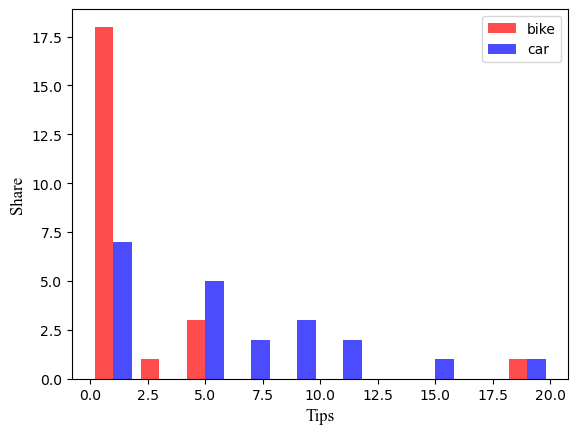

In [34]:
plt.hist([df2[df2.Arrived_in == i]['Tips'] for i in df2.Arrived_in.unique()],\
        alpha = 0.7, color = ['r', 'b'], label = df2.Arrived_in.unique())
plt.xlabel('Tips', fontname = 'Times New Roman', fontsize = 12)
plt.ylabel('Share', fontname = 'Times New Roman', fontsize = 12)
plt.legend(loc = 'upper right')
plt.show()

In [35]:
df2[(df2['Arrived_in'] == 'bike') & (df2['Tips'] == 0)].shape

(18, 6)

In [36]:
df2[(df2.Tips == 0)].shape

(25, 6)

In [37]:
df2[(df2['Arrived_in'] == 'car') & (df2['Tips'] == 0)].shape

(7, 6)

In [38]:
df2[(df2['Tips'] == 20)]

,Bill,Number_of_People,Arrived_in,Time_of_visit,Tips,Tips_cat
33,278,6,bike,evening,20,1
49,150,8,car,afternoon,20,1


In [40]:
y = df2.Tips_cat.values # чтобы получить не объект из данных, а массив np.array

In [41]:
type(y)

numpy.ndarray

In [42]:
df2[:1]

,Bill,Number_of_People,Arrived_in,Time_of_visit,Tips,Tips_cat
0,16,1,bike,morning,0,0


In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Bill              44 non-null     int64 
 1   Number_of_People  44 non-null     int64 
 2   Arrived_in        44 non-null     object
 3   Time_of_visit     44 non-null     object
 4   Tips              44 non-null     int64 
 5   Tips_cat          44 non-null     int32 
dtypes: int32(1), int64(3), object(2)
memory usage: 3.3+ KB


In [53]:
df2['Arrived_in_1'] = df2['Arrived_in'].astype('category')
df2['Arrived_in_code'] = df2['Arrived_in_1'].cat.codes

C:\Users\Inga\AppData\Local\Temp\ipykernel_21288\3158823065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Arrived_in_1'] = df2['Arrived_in'].astype('category')
C:\Users\Inga\AppData\Local\Temp\ipykernel_21288\3158823065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Arrived_in_code'] = df2['Arrived_in_1'].cat.codes


In [54]:
df2['Time_of_visit_1'] = df2['Time_of_visit'].astype('category')
df2['Time_of_visit_code'] = df2['Time_of_visit_1'].cat.codes

C:\Users\Inga\AppData\Local\Temp\ipykernel_21288\2813781073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Time_of_visit_1'] = df2['Time_of_visit'].astype('category')
C:\Users\Inga\AppData\Local\Temp\ipykernel_21288\2813781073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Time_of_visit_code'] = df2['Time_of_visit_1'].cat.codes


In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 49
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Bill                44 non-null     int64   
 1   Number_of_People    44 non-null     int64   
 2   Arrived_in          44 non-null     object  
 3   Time_of_visit       44 non-null     object  
 4   Tips                44 non-null     int64   
 5   Tips_cat            44 non-null     int32   
 6   Arrived_in_1        44 non-null     category
 7   Arrived_in_code     44 non-null     int8    
 8   Time_of_visit_1     44 non-null     category
 9   Time_of_visit_code  44 non-null     int8    
dtypes: category(2), int32(1), int64(3), int8(2), object(2)
memory usage: 3.7+ KB


In [56]:
df2.Time_of_visit_code.value_counts()

2    16
1    15
0    13
Name: Time_of_visit_code, dtype: int64

In [71]:
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score

In [73]:
ex = pd.DataFrame(data = [['TN', 'FP'],['FN', 'TP']], columns = ['Negative (0)', 'Positive (1)'], index = ['Negative (0)', 'Positive (1)'])
ex

,Negative (0),Positive (1)
Negative (0),TN,FP
Positive (1),FN,TP


In [74]:
X = df2[['Bill', 'Number_of_People', 'Arrived_in_code', 'Time_of_visit_code']]

In [75]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state=10)


In [76]:
X_train.shape

(35, 4)

In [77]:
X_valid.shape

(9, 4)

Смысл логистической модели в том, что мы показываем наши тренировочные фичи, а затем тренировочный исход

Провизуализируем наши тренировочные метки, то, что модель должна будет потом угадать

In [82]:
import seaborn as sns
sns.set_style('darkgrid')

In [83]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

<AxesSubplot:xlabel='Tips_cat', ylabel='Bill'>

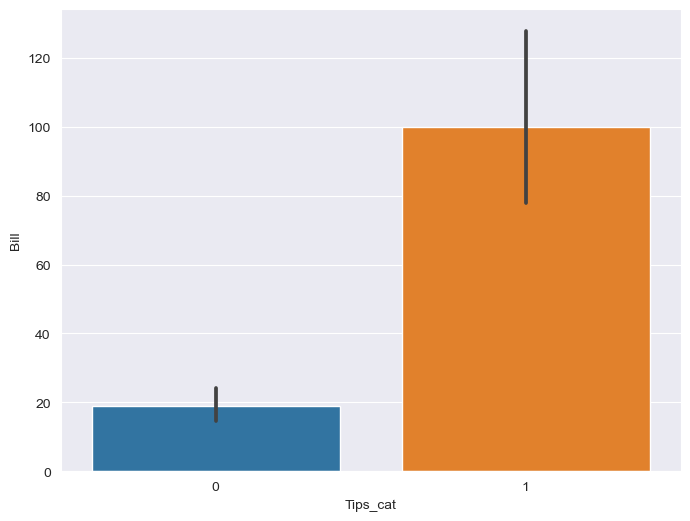

In [84]:
sns.barplot(x = 'Tips_cat', y = 'Bill', data = df2) # выводит средние значения
# но определитель (estimator) можем изменить 

In [85]:
df2[(df2['Bill'] > 0) & (df2['Tips_cat'] == 0)].mean()

C:\Users\Inga\AppData\Local\Temp\ipykernel_21288\2361857843.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[(df2['Bill'] > 0) & (df2['Tips_cat'] == 0)].mean()


Bill                  19.666667
Number_of_People       1.708333
Tips                   0.000000
Tips_cat               0.000000
Arrived_in_code        0.291667
Time_of_visit_code     1.166667
dtype: float64

<AxesSubplot:xlabel='Tips_cat', ylabel='Bill'>

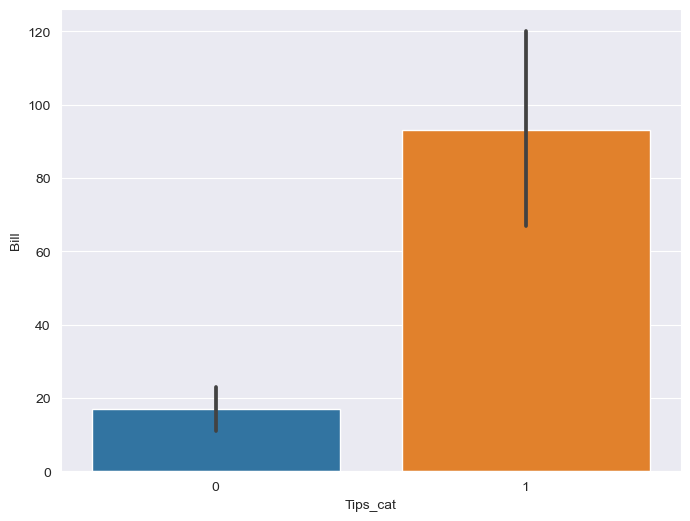

In [86]:
sns.barplot(x = 'Tips_cat', y = 'Bill', data = df2, estimator = np.median) 
# np.std...


<AxesSubplot:xlabel='Tips_cat', ylabel='Bill'>

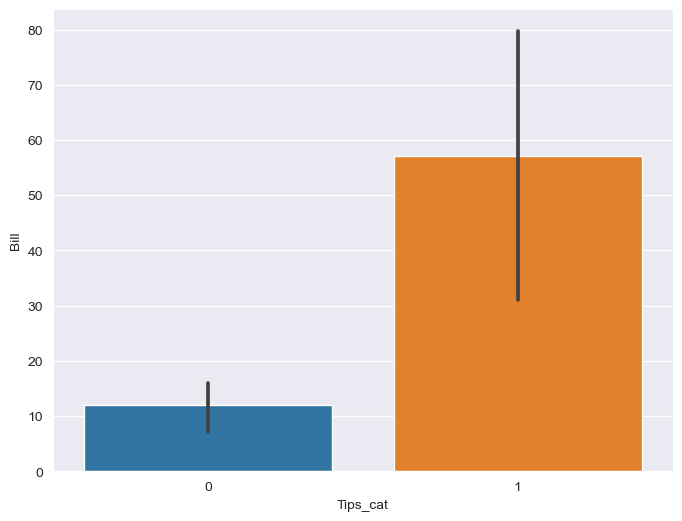

In [87]:
sns.barplot(x = 'Tips_cat', y = 'Bill', data = df2, estimator = np.std) 


Визуализируем при помощи countplot из библиотеки seaborn

__estimator в countplot считает количество совпадений__

<AxesSubplot:xlabel='Tips_cat', ylabel='count'>

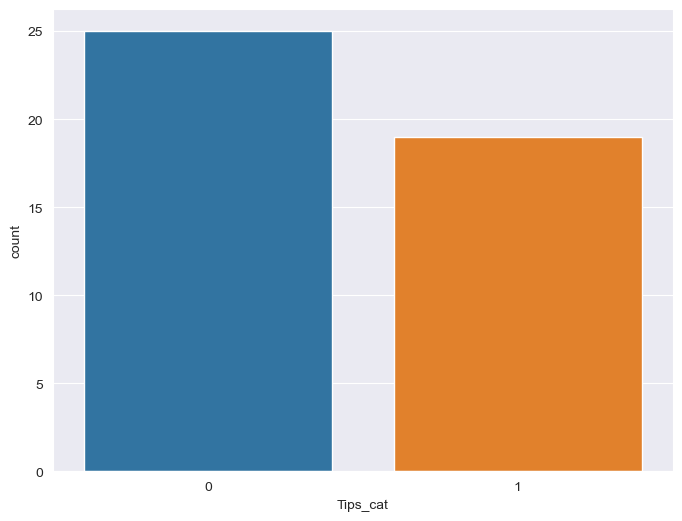

In [88]:
sns.countplot(x = 'Tips_cat', data = df2)

In [89]:
df2[df2['Tips_cat'] == 1].shape

(19, 10)

In [90]:
df2[df2['Tips_cat'] == 0].shape

(25, 10)

<AxesSubplot:xlabel='Time_of_visit', ylabel='Bill'>

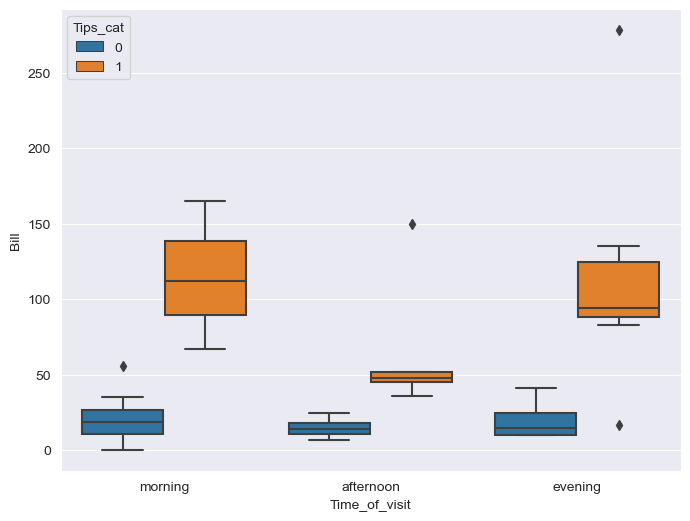

In [91]:
sns.boxplot(x = 'Time_of_visit', y = 'Bill', data = df2, hue = 'Tips_cat')

<AxesSubplot:xlabel='Time_of_visit', ylabel='Tips'>

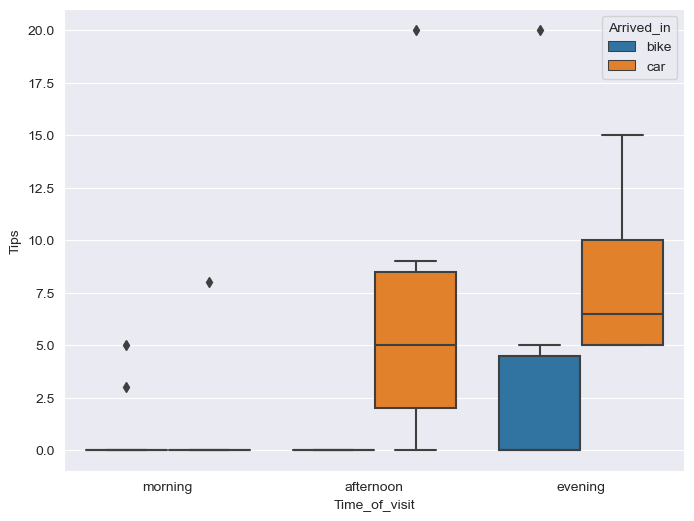

In [92]:
sns.boxplot(x = 'Time_of_visit', y = 'Tips', data = df2, hue = 'Arrived_in')

In [93]:
df2[df2['Time_of_visit'] == 'morning']

,Bill,Number_of_People,Arrived_in,Time_of_visit,Tips,Tips_cat,Arrived_in_1,Arrived_in_code,Time_of_visit_1,Time_of_visit_code
0,16,1,bike,morning,0,0,bike,0,morning,2
1,23,2,bike,morning,0,0,bike,0,morning,2
3,56,2,car,morning,0,0,car,1,morning,2
4,27,1,bike,morning,0,0,bike,0,morning,2
9,27,1,bike,morning,0,0,bike,0,morning,2
10,27,1,bike,morning,0,0,bike,0,morning,2
12,7,2,car,morning,0,0,car,1,morning,2
13,19,1,bike,morning,0,0,bike,0,morning,2
21,0,0,bike,morning,0,0,bike,0,morning,2
22,8,1,car,morning,0,0,car,1,morning,2


<AxesSubplot:xlabel='Time_of_visit', ylabel='Tips'>

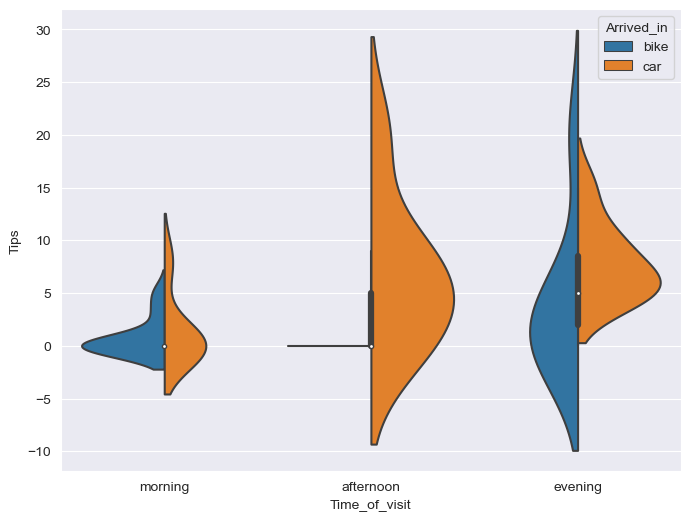

In [94]:
sns.violinplot(x = 'Time_of_visit', y = 'Tips', data = df2, hue = 'Arrived_in', split = True) 
# плотность распределения данных ( распределяется пропорционально плотности данных от средней линии, 
# простирается выше и ниже наибольшего/наименьшего значения)

In [95]:
df2_train, df2_valid = train_test_split(df2, test_size = 0.2, random_state=10)

In [96]:
df2_train.shape

(35, 10)

<AxesSubplot:xlabel='Tips_cat', ylabel='count'>

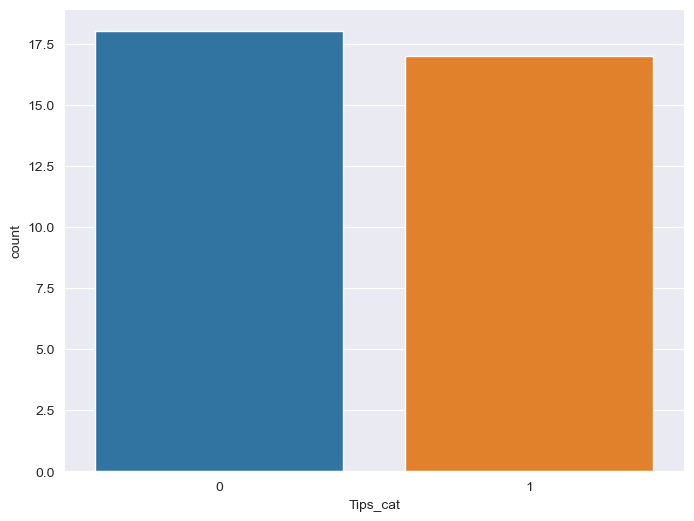

In [97]:
sns.countplot(x = 'Tips_cat', data = df2_train)

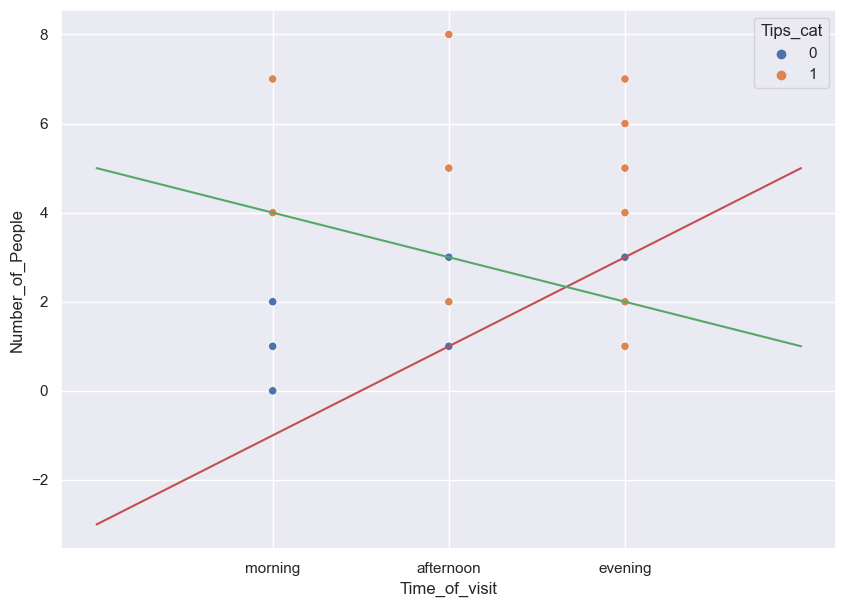

In [98]:
sns.set(rc = {'figure.figsize': (10,7)})
sns.scatterplot(x = 'Time_of_visit', y = 'Number_of_People', hue = 'Tips_cat', data = df2)


x = np.linspace(-1, 3, 50)
y1 = 2 * x - 1 
y2 = -1 * x + 4

plt.plot(x, y1, color = 'r')
plt.plot(x, y2, color = 'g')


##### Видим как распространены наши классы (Tips_cat) относительно двух параметров (Number_of_People и Time_of_visit)

__точки и расходятся, и диффундируют__ (проникают в облако друг друга)

Идеально линейно-разделимых множеств практически нет (прямых можно провести много и они будут давать разные ошибки. Как их посчитать?)

__Задача__ Подобрать прямую, которая бы минимизировала функцию потерь

__Если мы выявим ошибку и попробуем сделать ее наименьшей, мы сможем сформулировать задачу классификации__

Гипотеза, функция потерь (которую надо стремиться минимизировать), подбор параметров

In [99]:
### Нормируем данные

$$
norm_X = \frac{(X - X_{mean})}{X_{std}}
$$

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
z_score_scaler = StandardScaler() # Применяется только на обучающих данных

z_score_scaler.fit(X_train)

X_train_scaled = z_score_scaler.transform(X_train)
X_valid_scaled = z_score_scaler.transform(X_valid)

In [102]:
X_train_scaled[:2]

array([[-0.19634358,  0.93884688,  1.02899151, -1.51333761],
       [ 0.44057584,  0.93884688, -0.97182532, -0.22146404]])

__Создаем Logistic Regression Model__

In [103]:
Log_reg_model = LogisticRegression()

In [104]:
Log_reg_model.fit(X_train_scaled, y_train) #fit model

LogisticRegression()

In [105]:
y_pred = Log_reg_model.predict(X_valid_scaled)
y_pred_probs = Log_reg_model.predict_proba(X_valid_scaled)

In [106]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0])

In [107]:
y_pred_probs

array([[0.51265056, 0.48734944],
       [0.93632194, 0.06367806],
       [0.90149736, 0.09850264],
       [0.22360444, 0.77639556],
       [0.49890944, 0.50109056],
       [0.37303008, 0.62696992],
       [0.78528007, 0.21471993],
       [0.89503631, 0.10496369],
       [0.88009063, 0.11990937]])

__Коэффициенты__

In [109]:
coef = pd.DataFrame({'Coefs' : Log_reg_model.coef_[0],
                    'Names' : ['Bill', 'Number_of_People', 'Arrived_in_code', 'Time_of_visit_code']})
coef = coef.append({'Coefs' : Log_reg_model.intercept_[0],
                   'Names' : 'intercept'}, ignore_index = True)

C:\Users\Inga\AppData\Local\Temp\ipykernel_21288\3340873020.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef = coef.append({'Coefs' : Log_reg_model.intercept_[0],


In [110]:
coef
# Log odds

,Coefs,Names
0,1.789402,Bill
1,0.882918,Number_of_People
2,0.697742,Arrived_in_code
3,-0.431436,Time_of_visit_code
4,0.310638,intercept


In [114]:
df2.Time_of_visit_code.value_counts()

2    16
1    15
0    13
Name: Time_of_visit_code, dtype: int64

In [116]:
coef['Odds coef'] = np.exp(coef['Coefs'])
coef
# Имеем Log odds (0) coef и Odds (1) coef
# Чем выше коэффициент, тем круче логистическая кривая
# Предикторы, обладающие большим влиянием имеют более высокие коэффициенты
# i.e. a small change in that predictor will have a big change in the outcome

# Negative coef: Increase in predictor lead to the decrease of probability of smth

# Here almost all of the coefs have a positive relationships with the predictive probability (mornong = 2)
# При увеличении счета на 1 стандартное отклонение, логарифм шанса увеличивается, predicted log odds increse by 1.7 (+) 

# При увеличении счета на 1 стандартное отклонение, ptedicted odds increase in 5.98 times (multiply) (во столько раз выше)

# Intercept more positive, more moving to the left

,Coefs,Names,Odds coef
0,1.789402,Bill,5.985874
1,0.882918,Number_of_People,2.417946
2,0.697742,Arrived_in_code,2.009211
3,-0.431436,Time_of_visit_code,0.649576
4,0.310638,intercept,1.364295


__Логистическая функция (сигмоида)__

$$
p = \frac{1} {1 + {e^-}^y}
$$

$$
p = \frac {1}{1 + {e^{(\beta_0 + \beta_1 x)}}}
$$

__Уравнение логистической регрессии__

$$
y = ln(Odds) = ln(\frac{p}{1 - p}) = \beta_0 + \beta_1 \cdot x_1 + ... + = \beta_k \cdot x_k 
$$

__Порог дифференциации для predicted probability__ (threshold)

Обычно 0.5

In [117]:
X_7 = df2[['Bill', 'Number_of_People', 'Arrived_in_code', 'Time_of_visit_code']]
X_7_scaled = z_score_scaler.transform(X_7)

In [118]:
y_pred_prob = Log_reg_model.predict_proba(X_7_scaled)
y_pred_prob = y_pred_prob[:,1] # probability for the cat_1

In [119]:
thresh = 0.7 # harder to be classified as class 1

In [120]:
y_pred_prob_thresh = y_pred_prob > thresh
y_pred_prob_thresh
# True is higher than the threshold

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True])

In [121]:
y_pred_prob_thresh = (y_pred_prob > thresh) * 1
y_pred_prob_thresh

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [136]:
unique, counts = np.unique(y_pred_prob_thresh, return_counts = True)
print(unique, counts)

[0 1] [30 14]


In [123]:
thresh2 = 0.1

In [130]:
y_pred_prob_thresh2 = (y_pred_prob > thresh2) * 1
y_pred_prob_thresh2

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [135]:
unique, counts = np.unique(y_pred_prob_thresh2, return_counts = True)
print(unique, counts)

[0 1] [ 9 35]


__Regularization__

In [140]:
Logit = LogisticRegression()
Logit.fit(X_train, y_train)

print(Logit.coef_)
print(Logit.intercept_) 
#ближе к нулевым значениям

[[ 0.13555978 -0.2419348   0.93868992 -0.49294109]]
[-4.70723737]


In [141]:
Logit2 = LogisticRegression(penalty = 'none')
Logit2.fit(X_train, y_train)

print(Logit2.coef_)
print(Logit2.intercept_)

[[  3.68457519 -33.30200595  89.6784245   -5.14818024]]
[-90.6631031]


In [142]:
Logit3 = LogisticRegression(penalty = 'l2')
Logit3.fit(X_train, y_train)

print(Logit3.coef_)
print(Logit3.intercept_)

[[ 0.13555978 -0.2419348   0.93868992 -0.49294109]]
[-4.70723737]


__Метрика качества__

In [144]:
from sklearn.metrics import accuracy_score, f1_score,\
recall_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve

####  accuracy_score - доля правильных ответов алгоритма

$$
accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

In [146]:
accuracy_score(y_valid, y_pred)
print('Accuracy :', accuracy_score(y_valid, y_pred))

Accuracy : 0.8888888888888888


__F метрика учитывает FP и FN__

$$
F1 = 2 \cdot \frac{precision \cdot recall} {precision + recall}
$$

In [147]:
print('F1_score: ', f1_score(y_valid, y_pred))

F1_score:  0.8


__recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм__

$$
recall = \frac{TP}{TP + FN}
$$

In [148]:
print('Recall: ', recall_score(y_valid, y_pred))

Recall:  1.0


__Precision - доля объектов, названных классификатором положительными и при этом действительно являющиеся положительными__

$$
precision = \frac{TP}{TP + FP}
$$

In [150]:
print('Precision: ', precision_score(y_valid, y_pred))

Precision:  0.6666666666666666


### Metrics on train data

In [151]:
print('Accuracy :', accuracy_score(y_train, Log_reg_model.predict(X_train_scaled)))
print('F1_score: ', f1_score(y_train, Log_reg_model.predict(X_train_scaled)))
print('Recall: ', recall_score(y_train, Log_reg_model.predict(X_train_scaled)))
print('Precision: ', precision_score(y_train, Log_reg_model.predict(X_train_scaled)))

Accuracy : 0.9142857142857143
F1_score:  0.9090909090909091
Recall:  0.8823529411764706
Precision:  0.9375


In [152]:
confusion_matrix(y_valid, y_pred)

array([[6, 1],
       [0, 2]], dtype=int64)

C:\Users\Inga\anaconda33\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


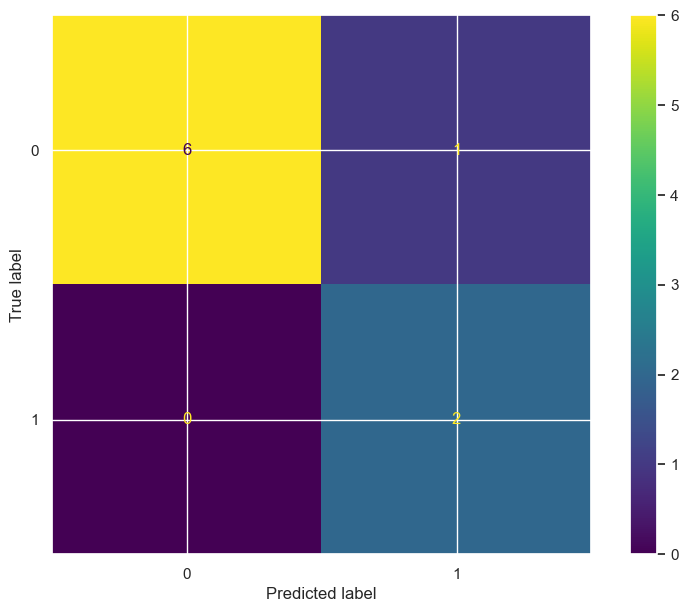

In [153]:
plot_confusion_matrix(Log_reg_model, X_valid_scaled, y_valid)

### Roc curve

__Взаимосвязь между чувствительностью модели (TPR - true positive rate) и ее специфичностью (FPR - false positive rate)__

$$
TPR = \frac {TP} {TP + FN}
$$

$$
FPR = \frac {FP} {FP + TN}
$$

Сравнивается как меняется чувствительность по отношению к ложноположительным долям на разных порогах отсечения.

C:\Users\Inga\anaconda33\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Inga\anaconda33\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


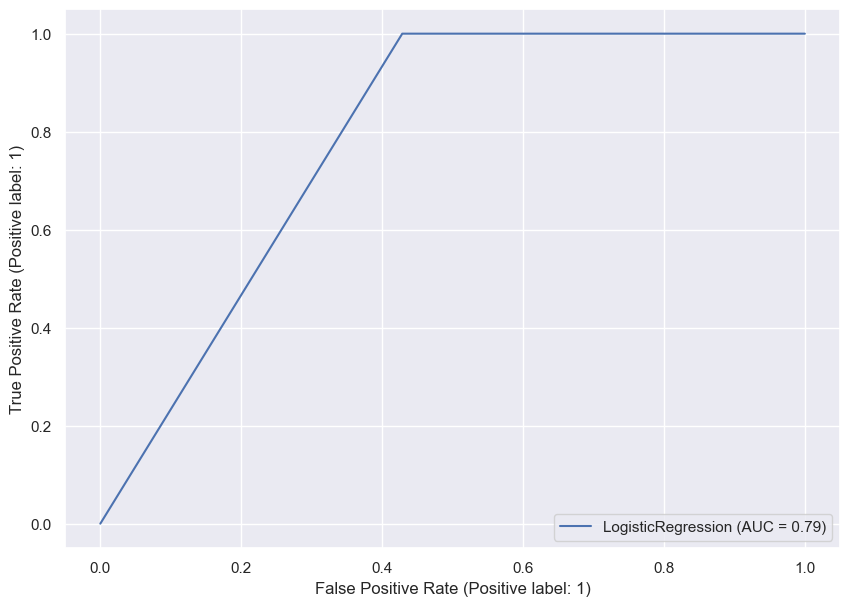

In [177]:
plot_roc_curve(Log_reg_model, X_valid, y_valid)
# area under curve

C:\Users\Inga\anaconda33\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Inga\anaconda33\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


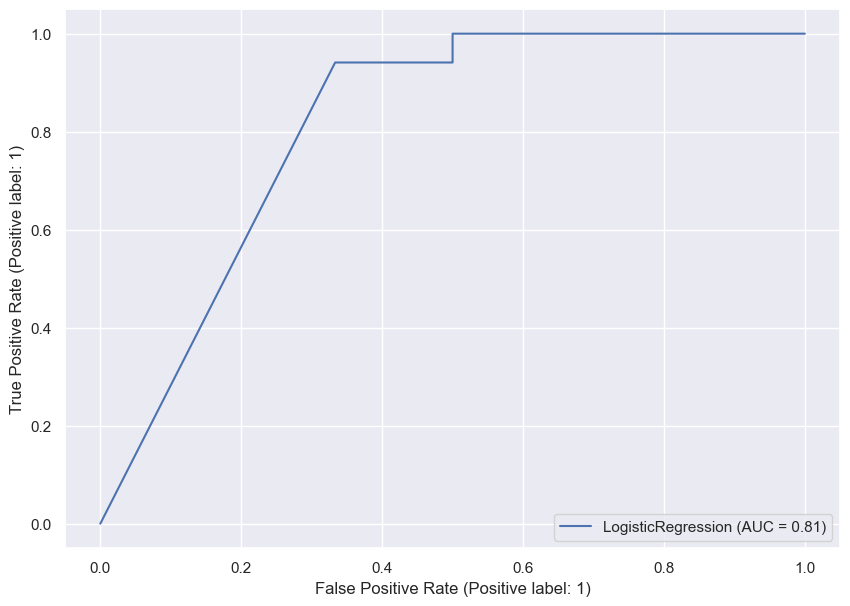

In [176]:
plot_roc_curve(Log_reg_model, X_train, y_train)

__Проверим работу модели на новых данных__

In [154]:
df_new = pd.read_csv('C:/Users/Inga/Market_test/Логистическая регрессия/tips_extended_new.csv')

In [155]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Bill              10 non-null     int64 
 1   Number_of_People  10 non-null     int64 
 2   Arrived_in        10 non-null     object
 3   Time_of_visit     10 non-null     object
 4   Tips              10 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 528.0+ bytes


In [156]:
df_new['Arrived_in_1'] = df_new['Arrived_in'].astype('category')
df_new['Arrived_in_code'] = df_new['Arrived_in_1'].cat.codes

df_new['Time_of_visit_1'] = df_new['Time_of_visit'].astype('category')
df_new['Time_of_visit_code'] = df_new['Time_of_visit_1'].cat.codes

In [157]:
df_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Bill                10 non-null     int64   
 1   Number_of_People    10 non-null     int64   
 2   Arrived_in          10 non-null     object  
 3   Time_of_visit       10 non-null     object  
 4   Tips                10 non-null     int64   
 5   Arrived_in_1        10 non-null     category
 6   Arrived_in_code     10 non-null     int8    
 7   Time_of_visit_1     10 non-null     category
 8   Time_of_visit_code  10 non-null     int8    
dtypes: category(2), int64(3), int8(2), object(2)
memory usage: 824.0+ bytes


In [158]:
X_new = df_new[['Bill', 'Number_of_People', 'Arrived_in_code', 'Time_of_visit_code']]
X_new[:2]

,Bill,Number_of_People,Arrived_in_code,Time_of_visit_code
0,6,1,0,0
1,25,4,1,1


In [159]:
X_new_scaled = z_score_scaler.transform(X_new)

In [160]:
y_pred_new = Log_reg_model.predict(X_new_scaled)

In [161]:
print('Accuracy :', accuracy_score(df_new['Tips'], y_pred_new))
print('F1_score: ', f1_score(df_new['Tips'], y_pred_new))
print('Recall: ', recall_score(df_new['Tips'], y_pred_new))
print('Precision: ', precision_score(df_new['Tips'], y_pred_new))

Accuracy : 0.8
F1_score:  0.6666666666666666
Recall:  0.5
Precision:  1.0


C:\Users\Inga\anaconda33\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


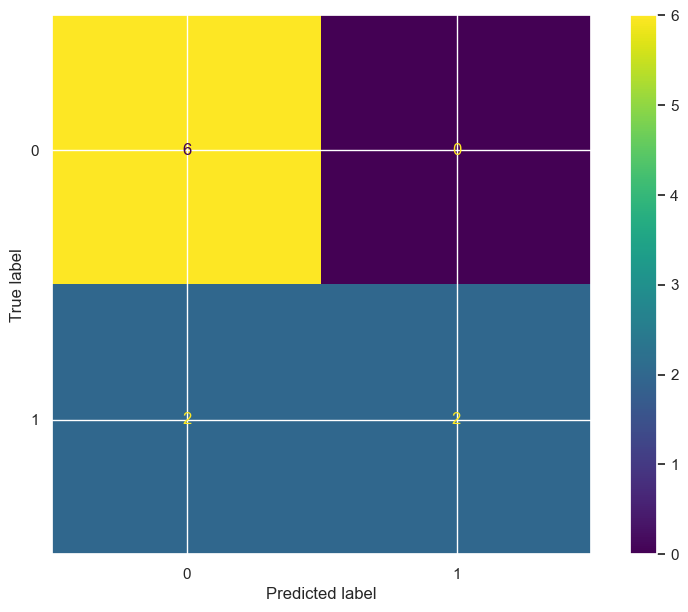

In [162]:
plot_confusion_matrix(Log_reg_model, X_new_scaled, df_new['Tips']) #confusion matrix